# **Analisa Rekomendasi Pembuatan Film berdasarkan Data Netflix**

# **A. Persiapan**

## A.1. Import library

Pada tahap ini memasukkan library pandas yang berisi struktur data dan analisis data yang mudah digunakan umum nya untuk membuat tabel, mengubah dimensi data, mengecek data, dan lain sebagainya.selanjutnya matplotlib.pyplot adalah kumpulan fungsi yang membuat beberapa perubahan pada gambar: misalnya, membuat gambar, membuat area plot dalam gambar, menambah label di plot dan lainnya, meskipun keduanya sama-sama digunakan untuk visualisasi, namun Matplotlib hanya dapat digunakan untuk visualisasi dasar, sedangkan untuk menghasilkan visualisasi yang lebih menarik dapat menggunakan Seaborn

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## A.2. Import dataset

Input file kaggle.json kemudian menjalankan direktori berikut ini

In [ ]:
! mkdir ~/.kaggle

Memindahkan file kaggle.json ke ~/.kaggle, yang merupakan tempat API token berada

In [ ]:
! cp kaggle.json ~/.kaggle/

! chmod 600 ~/.kaggle/kaggle.json digunakan untuk mengubah jenis akses direktori kaggle dan api Anda akan berfungsi dengan baik

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

Pada tahapan ini dataset di download dalam bentuk zip 

In [ ]:
! kaggle datasets download shivamb/netflix-shows

  0% 0.00/1.34M [00:00<?, ?B/s]
100% 1.34M/1.34M [00:00<00:00, 85.1MB/s]


Perintah ini digunakan untuk mengekstrak netflix-show.zip

In [ ]:
!unzip netflix-shows.zip

Archive:  netflix-shows.zip
  inflating: netflix_titles.csv      


Membuat data frame bernama df dan menampilkan 

In [ ]:
df = pd.read_csv('netflix_titles.csv')
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


## A.3. Mengganti/membersihkan missing value

Menampilkan jumlah data yang bernilai NaN untuk objek seperti array

In [ ]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

Mengganti nilai NaN pada direktor, cast dan country menjadi anonymous dan membuat perubahan secara permanen. Hal ini dilakukan karena missing value pada kolom tersebut sangat banyak.

In [ ]:
df['director'].fillna('Anonymous', inplace=True)
df['cast'].fillna('Anonymous', inplace=True)
df['country'].fillna('Anonymous', inplace=True)

Menampilkan kembali jumlah data yang bernilai NaN untuk objek seperti array

In [ ]:
df.isnull().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           4
duration         3
listed_in        0
description      0
dtype: int64

Menghapus nilai NaN dan membuat perubahan secara permanen

In [ ]:
df.dropna(inplace=True)

Menampilkan kembali jumlah data yang bernilai NaN untuk objek seperti array

In [ ]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

Menampilkan dataframe df yang berisi 8790 rows × 12 columns

In [ ]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Anonymous,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Anonymous,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Anonymous,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Anonymous,Anonymous,Anonymous,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Anonymous,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,Anonymous,Anonymous,Anonymous,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


Menampilkan informasi tentang dataframe

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8790 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   cast          8790 non-null   object
 5   country       8790 non-null   object
 6   date_added    8790 non-null   object
 7   release_year  8790 non-null   int64 
 8   rating        8790 non-null   object
 9   duration      8790 non-null   object
 10  listed_in     8790 non-null   object
 11  description   8790 non-null   object
dtypes: int64(1), object(11)
memory usage: 892.7+ KB


# **B. Jenis Film**

## B.1. Menambahkan kolom tahun penambahan film ke netflix

Menambahkan kolom baru yang bernama 'date_added_year'.

In [ ]:
df['date_added_year'] = df['date_added'].str[-4:]
df['date_added_year'] = df['date_added_year'].astype('int')
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_added_year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Anonymous,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021
1,s2,TV Show,Blood & Water,Anonymous,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Anonymous,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021
3,s4,TV Show,Jailbirds New Orleans,Anonymous,Anonymous,Anonymous,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021
4,s5,TV Show,Kota Factory,Anonymous,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019
8803,s8804,TV Show,Zombie Dumb,Anonymous,Anonymous,Anonymous,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2019
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020


## B.2. Perbandingan jenis film

Menampilkan jumlah film berdasarkan typenya.

In [ ]:
df.type.value_counts()

Movie      6126
TV Show    2664
Name: type, dtype: int64

Memvisualiasikan perbandingan jumlah film antara TV Show dan Movie.

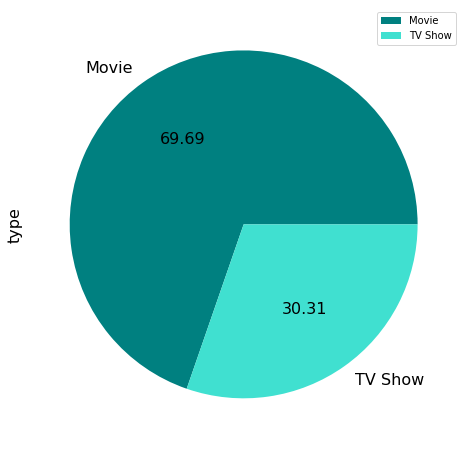

In [ ]:
df.type.value_counts().plot(kind='pie',autopct="%.2f",textprops = {'color': 'black','fontsize':16},figsize = (8,8),colors = ['teal', 'turquoise'],legend=True)
plt.ylabel('type', fontsize=16)
plt.show()

Pada diagram di atas dapat dilihat. Film yang paling banyak ditayangkan adalah tipe Movie dibandingkan dengan TV-Show.
Dengan mendapatkan persentase 69.69% untuk Movie, dan TV-Show sebanyak 30.31%.

## B.3. Visualisasi rilis film berdasarkan tahun

Menampilkan jumlah film yang dirilis dari tahun ke tahun menggunakan diagram bar.

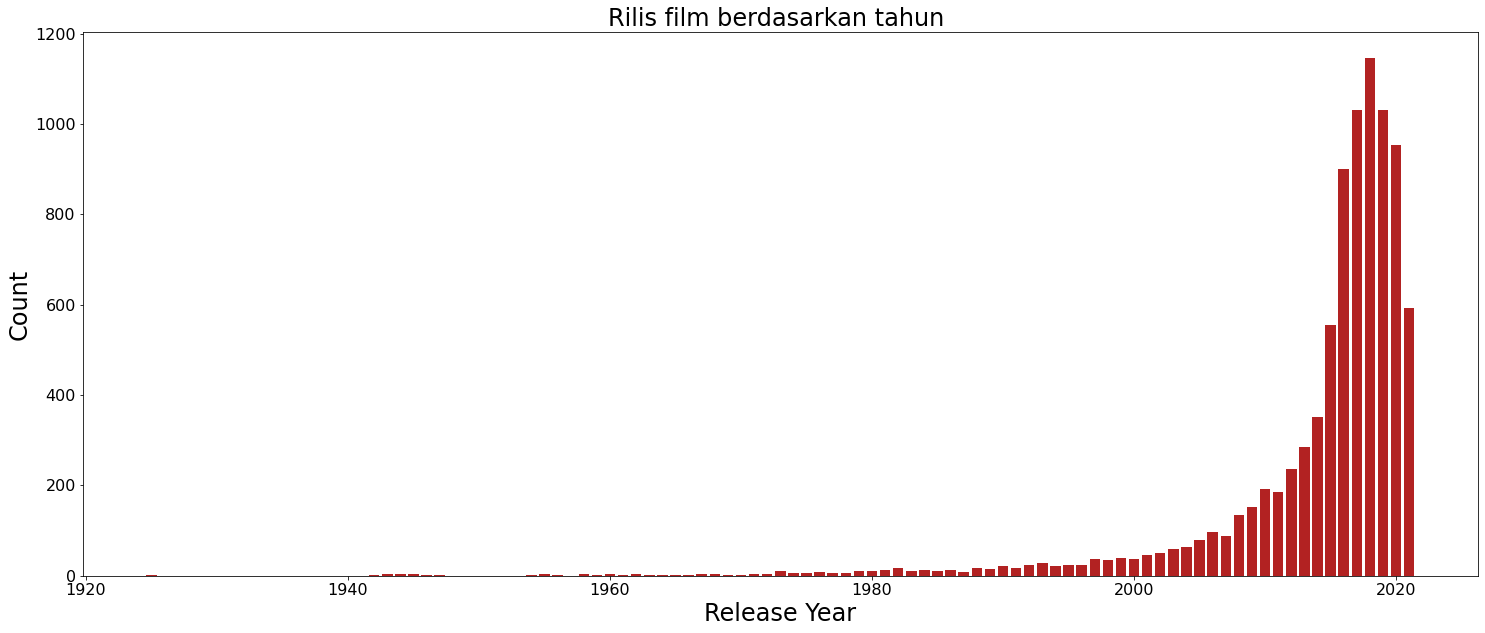

In [ ]:
plt.figure(figsize=(25,10))
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16)
plt.bar(df['release_year'].value_counts().keys(), df['release_year'].value_counts(),color = "firebrick")
plt.title("Rilis film berdasarkan tahun ",fontsize=24)
plt.xlabel('Release Year', fontsize=24)
plt.ylabel('Count', fontsize=24)
plt.show()

Berdasarkan diagram di atas, film yang paling banyak dirilis pada tahun 2018 dibandingkan tahun - tahun sebelumnya. Lalu, pada tahun 2019, 2020 dan 2021 mengalami penurunan secara perlahan, mungkin dikarenakan adanya pandemi yang sangat menghawatirkan. Jadi banyak film yang mengalami penundaan pembuatan film.

## B.4. Visualisasi penambahan film ke netflix berdasarkan tahun

Menampilkan jumlah film yang ditambahkan ke netflix dari tahun ke tahun menggunakan diagram bar.

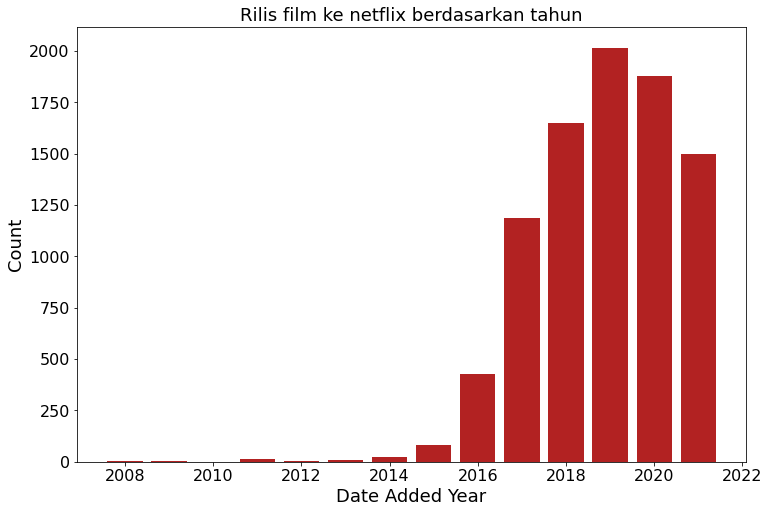

In [ ]:
plt.figure(figsize=(12,8))
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16)
plt.bar(df['date_added_year'].value_counts().keys(), df['date_added_year'].value_counts(), color ="firebrick")
plt.title("Rilis film ke netflix berdasarkan tahun",fontsize=18)
plt.xlabel('Date Added Year', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.show()

Pada diagram di atas, film yang dimasukkan ke dalam netflix paling banyak pada tahun 2019. Dan tahun 2020, dan 2021 mengalami penurunan pada film yang dimasukkan ke netflix. Karena stok film yang dirilis pada tahun 2019 hingga 2021 mengalami penurunan dibandingkan tahun 2018.

## B.5. Perbandingan jenis film dari tahun ke tahun berdasarkan tahun penambahan ke netfix

Dari tahun ke tahun penambahan film ke netflix terus ada dan di sini kita dapat membandingkan jenis film yang ditambahkan dari tahun ke tahun. Perbandingan antara movie dengan TV dapat digambarkan sebagai berikut.

Yang pertama adalah membuat tabel grouping menggunakan fungsi *groupby* untuk melihat berapa banyak film yang ditambahkan ke netflix berdasarkan type dan tahun penambahan film ke netflix.

In [ ]:
grup_type = df.groupby([df['date_added_year'],df['type']])[['type']].aggregate('count')
grup_type.rename(columns = {'type':'count'}, inplace = True)
grup_type

count
date_added_year type          
2008            Movie        1
                TV Show      1
2009            Movie        2
2010            Movie        1
2011            Movie       13
2012            Movie        3
2013            Movie        6
                TV Show      5
2014            Movie       19
                TV Show      5
2015            Movie       56
                TV Show     26
2016            Movie      251
                TV Show    175
2017            Movie      836
                TV Show    349
2018            Movie     1237
                TV Show    411
2019            Movie     1424
                TV Show    592
2020            Movie     1284
                TV Show    595
2021            Movie      993
                TV Show    505

Dari hasil grouping di atas, Movie dan TV Show masing-masing dijadikan judul kolom menggunakan fungsi *pivot_table*.

In [ ]:
grup_type2 = grup_type.pivot_table(values='count', index='date_added_year', columns='type', aggfunc='first')
grup_type2

type,Movie,TV Show
date_added_year,,
2008,1.0,1.0
2009,2.0,NaN
2010,1.0,NaN
2011,13.0,NaN
2012,3.0,NaN
2013,6.0,5.0
2014,19.0,5.0
2015,56.0,26.0
2016,251.0,175.0


Tabel di atas dapat divisualisasikan sebagai berikut.

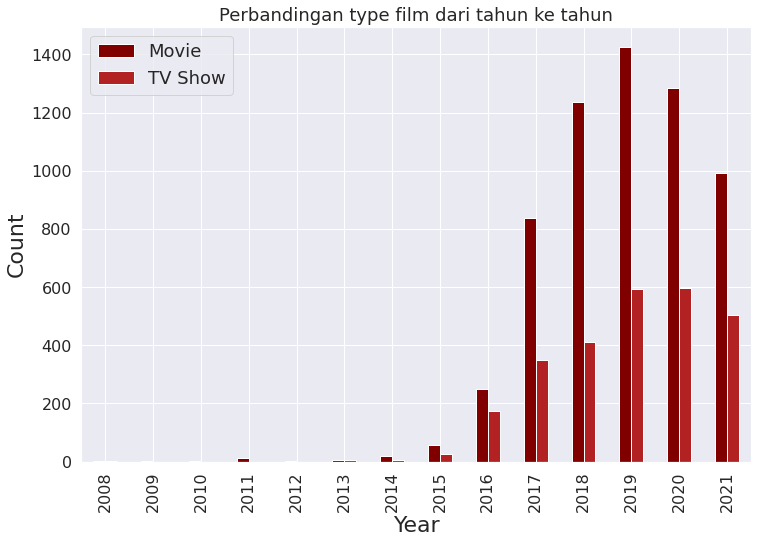

In [ ]:
grup_type2.plot(kind='bar',color= ["maroon","firebrick"],fontsize=16, figsize=(12,8), legend =True)
plt.legend(fontsize=18)
plt.title("Perbandingan type film dari tahun ke tahun",fontsize=18)
plt.ylabel('Count',fontsize=22)
plt.xlabel('Year',fontsize=22)
plt.show()

Pada diagram terlihat bahwa kedua type film mengalami peningkatan yang signifikan sejak tahun 2015. Dari segi perbandingan, type film Movie terus unggul setiap tahun. Sehingga dapat dikatakan bahwa minat terhadap film type Movie lebih tinggi dibandingkan TV Show.

# **C. Negara dan Sutradara**

## C.1. Negara terpopuler

Salah satu hal yang dapat dijadikan perhatian dalam pembuatan film adalah tempat pembuatan film. Pada data ini tempat yang dicantumkan adalah negara.
Di sini kita akan menentukan negara-negara yang menjadi tempat populer pembuatan film.

Berikut ini urutan jumlah film berdasarkan negara pembuatan film.

In [ ]:
negara = df.groupby(df['country'])['country'].aggregate('count').to_frame()
negara.rename(columns = {'country':'count'}, inplace = True)
negara.reset_index(inplace = True)
negara.sort_values(by = "count", ascending=False).head()

,country,count
604,United States,2809
252,India,972
2,Anonymous,829
507,United Kingdom,418
320,Japan,243


Tabel di atas merupakan lima negara terpopuler yang dijadikan tempat pembuatan film. Namun pada data tersebut masih terdapat film yang tidak diketahui negaranya (anonymous), sehingga perlu dibersihkan / dikecualikan.

In [ ]:
most_popular = negara[negara['country']!='Anonymous']
most_popular.sort_values(by = "count", ascending=False).head()

,country,count
604,United States,2809
252,India,972
507,United Kingdom,418
320,Japan,243
436,South Korea,199


Di bawah ini merupakan visualiasi negara terpopuler, dapat dilihat United States merupakan negara dengan jumlah film terbanyak dan selalu terbanyak dari tahun ke tahun.

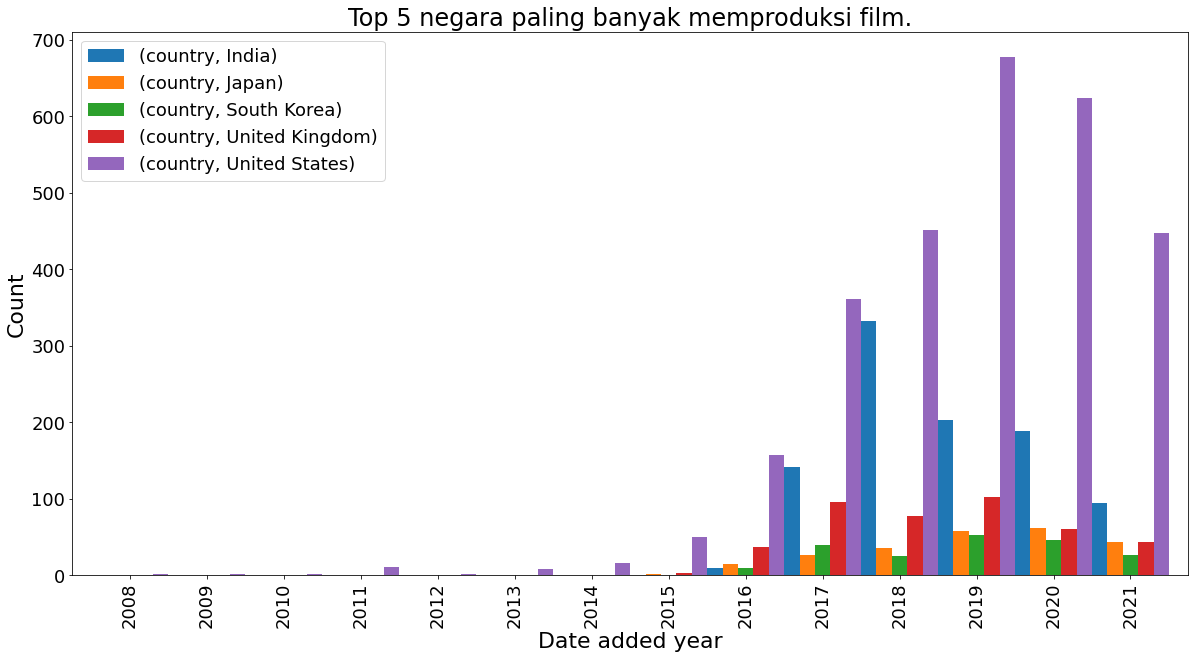

In [ ]:
negara_terbanyak = df[df['country'].isin(['United States','India','United Kingdom','Japan','South Korea'])]
negara_terbanyak = negara_terbanyak.groupby(['date_added_year','country']).agg({'country':'count'}).unstack()
negara_terbanyak.plot(kind = "bar",figsize = (20,10),fontsize=18,width=1)
plt.legend(fontsize=18)
plt.title("Top 5 negara paling banyak memproduksi film.",fontsize=24)
plt.xlabel("Date added year",fontsize=22)
plt.ylabel("Count",fontsize=22)
plt.show()

Pada diagram di atas menampilkan top 5 negara yang paling banyak memproduksi film. Dapat disimpulkan "United State" adalah negara yang memproduksi film paling banyak setiap tahunnya.

## C.2. Jumlah Film berdasarkan Sutradara

Pada bagian ini merupakan perhitungan jumlah film yang dibuat oleh sutradara dan mencari tahu siapa saja sutradara yang populer dalam pembuatan film.

### C.2.1. Jumlah film yang tidak diketahui sutradaranya



Pada data sutradara ini terdapat beberapa film yang tidak diketahui nama sutradaranya sehingga diganti dengan istilah Anonymous. Banyaknya film yang nama sutradaranya tidak diketahui dapat ditentukan sebagai berikut.

In [ ]:
grup_director = df.groupby([df['director']])[['director']].count()
grup_director.rename(columns = {'director':'number of movies'}, inplace = True)
grup_director.reset_index(inplace = True)

In [ ]:
anonymous = grup_director[grup_director['director']=='Anonymous']['number of movies'].sum()
anonymous

2621

Film yang tidak diketahui nama sutradaranya sebanyak 2621.

### C.2.2. Perbandingan sutradara yang diketahui dengan sutradara yang tidak diketahui

Dari dataset ini kita bisa mengetahui berapa persen film yang tidak diketahui nama sutradaranya.

In [ ]:
not_anonymous = grup_director[grup_director['director']!='Anonymous']['number of movies'].sum()

In [ ]:
df_anonymous = pd.DataFrame({'Jumlah': [anonymous,not_anonymous]},
                  index=['anonymous','not_anonymous'])
df_anonymous

,Jumlah
anonymous,2621
not_anonymous,6169


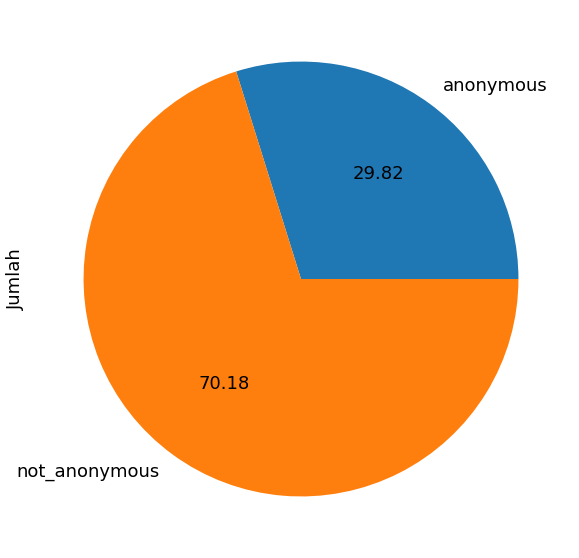

In [ ]:
df_anonymous.plot(kind='pie', y='Jumlah', legend=False, autopct="%.2f",fontsize = 18, figsize = (10,10))
plt.ylabel('Jumlah', fontsize=18)
plt.show()

Film yang tidak diketahui nama sutradaranya memiliki persentase 29,82% dan yang diketahui 70,18%.

### C.2.3. Sutradara yang populer

Sebelumnya sudah diketahui berapa persen film yang tidak diketahui nama sutradaranya, yaitu 29,82%. Sehingga masih memungkinkan untuk mencari director populer, karena di sini sutradaranya tidak diketahui tidak diperhitungkan dalam mencari sutradara populer.

Pertama menghapus director dengan value anonymous.

In [ ]:
grup_director.drop(grup_director[grup_director['director']=='Anonymous'].index, inplace=True)

Kemudian diurutkan berdasarakan jumlah film.

In [ ]:
grup_director.sort_values(by='number of movies', ascending=False).head(5)

,director,number of movies
3391,Rajiv Chilaka,19
3442,"Raúl Campos, Jan Suter",18
4045,Suhas Kadav,16
2597,Marcus Raboy,16
1790,Jay Karas,14


In [ ]:
grup_director.sort_values(by='number of movies', ascending=True).head(5)

,director,number of movies
1881,Jesse Warn,1
2478,Ludovic Bernard,1
2479,Ludovico Di Martino,1
2480,"Luis Alberto Restrepo, Andrés Beltrán, Jaime Rayo",1
2481,Luis Alejandro Pérez,1


Pada tabel di atas terlihat nama sutradara terpopuler dan urutan sutradara terbawah. Di sini kita tidak memperhitungkan negara pembuatan film.

### C.2.4. Jumlah film yang dibuat oleh Sutradara pada suatu negara

Kita telah menemukan sutradara yang populer, namun belum diketahui di negara mana saja mereka membuat film dan negara mana yang sering dijadikan tempat pembuatan film.

Di sini, kita akan mencari tahu sutradara yang sering membuat film dan konsistensinya terhadap negara pembuatan filmnya.

Terlebih dahulu dibuat grouping berdasarkan director dan country.

In [ ]:
grup_director2 = df.groupby([df['director'],df['country']])[['country']].count()
grup_director2.rename(columns = {'country':'number of movies'}, inplace = True)
grup_director2.reset_index(inplace = True)

Menghapus director dan country yang tidak diketahui.

In [ ]:
grup_director2.drop(grup_director2[grup_director2['director']=='Anonymous'].index, inplace=True)
grup_director2.drop(grup_director2[grup_director2['country']=='Anonymous'].index, inplace=True)

Daftar 10 sutradara teratas berdasarkan konsistensi pembuatan film pada suatu negara setelah menghilangkan data yang tidak diketahui.

In [ ]:
grup_director2.sort_values(by='number of movies', ascending=False).head(10)

,director,country,number of movies
3005,Marcus Raboy,United States,15
2126,Jay Karas,United States,14
923,Cathy Garcia-Molina,Philippines,13
2123,Jay Chapman,United States,12
1236,David Dhawan,India,9
3966,"Raúl Campos, Jan Suter",Mexico,9
4906,Troy Miller,United States,8
3095,Martin Scorsese,United States,8
1819,Hakan Algül,Turkey,8
5137,Yılmaz Erdoğan,Turkey,8


Pada tabel ini terlihat berbeda dengan tabel sutradara terpopuler sebelumnya. Hal ini dikarenakan pada tabel ini negara diikutsertakan dalam grouping dan negara yang anonymous juga dihapus. 
Jadi pada tabel ini kita dapat mengetahui sutradara yang sering membuat film dan di negara mana dia sering membuat film.

## C.3. Klasifikasi dan visualisasi Sutradara berdasarkan negara terpopuler

Dari negara-negara yang populer kita dapat mengetahui siapa saja sutradara yang sering membuat film di negara-negara tersebut.

In [ ]:
grup_director2_US = grup_director2[grup_director2['country']=='United States']
us = grup_director2_US.sort_values(by='number of movies', ascending=False).head(5)
us

,director,country,number of movies
3005,Marcus Raboy,United States,15
2126,Jay Karas,United States,14
2123,Jay Chapman,United States,12
4209,Ryan Polito,United States,8
4425,Shannon Hartman,United States,8


In [ ]:
grup_director2_IND = grup_director2[grup_director2['country']=='India']
ind = grup_director2_IND.sort_values(by='number of movies', ascending=False).head(5)
ind

,director,country,number of movies
1236,David Dhawan,India,9
3928,Ram Gopal Varma,India,7
1960,Imtiaz Ali,India,6
4523,Sooraj R. Barjatya,India,6
324,Anees Bazmee,India,6


In [ ]:
grup_director2_UK = grup_director2[grup_director2['country']=='United Kingdom']
uk = grup_director2_UK.sort_values(by='number of movies', ascending=False).head(5)
uk

,director,country,number of movies
1426,Edward Cotterill,United Kingdom,4
3128,Matt Askem,United Kingdom,2
727,Ben Wheatley,United Kingdom,2
1168,Daniel Kontur,United Kingdom,2
3757,Peter Orton,United Kingdom,2


In [ ]:
grup_director2_JPN = grup_director2[grup_director2['country']=='Japan']
jpn = grup_director2_JPN.sort_values(by='number of movies', ascending=False).head(5)
jpn

,director,country,number of movies
4884,Toshiya Shinohara,Japan,7
3112,Masahiko Murata,Japan,4
3527,Noriyuki Abe,Japan,3
2674,"Kobun Shizuno, Hiroyuki Seshita",Japan,3
4885,Toshiyuki Kubooka,Japan,3


In [ ]:
grup_director2_SK = grup_director2[grup_director2['country']=='South Korea']
sk = grup_director2_SK.sort_values(by='number of movies', ascending=False).head(5)
sk

,director,country,number of movies
4296,Sang-ho Yeon,South Korea,2
3646,Park Hoon-jung,South Korea,2
4459,Shin Won-ho,South Korea,2
3648,Park Joon-hwa,South Korea,1
2767,Lee Eung-bok,South Korea,1


Di bawah ini adalah visualisasi lima sutradara yang sering membuat film pada negara terpopuler.

Text(0, 0.5, 'number of movies')

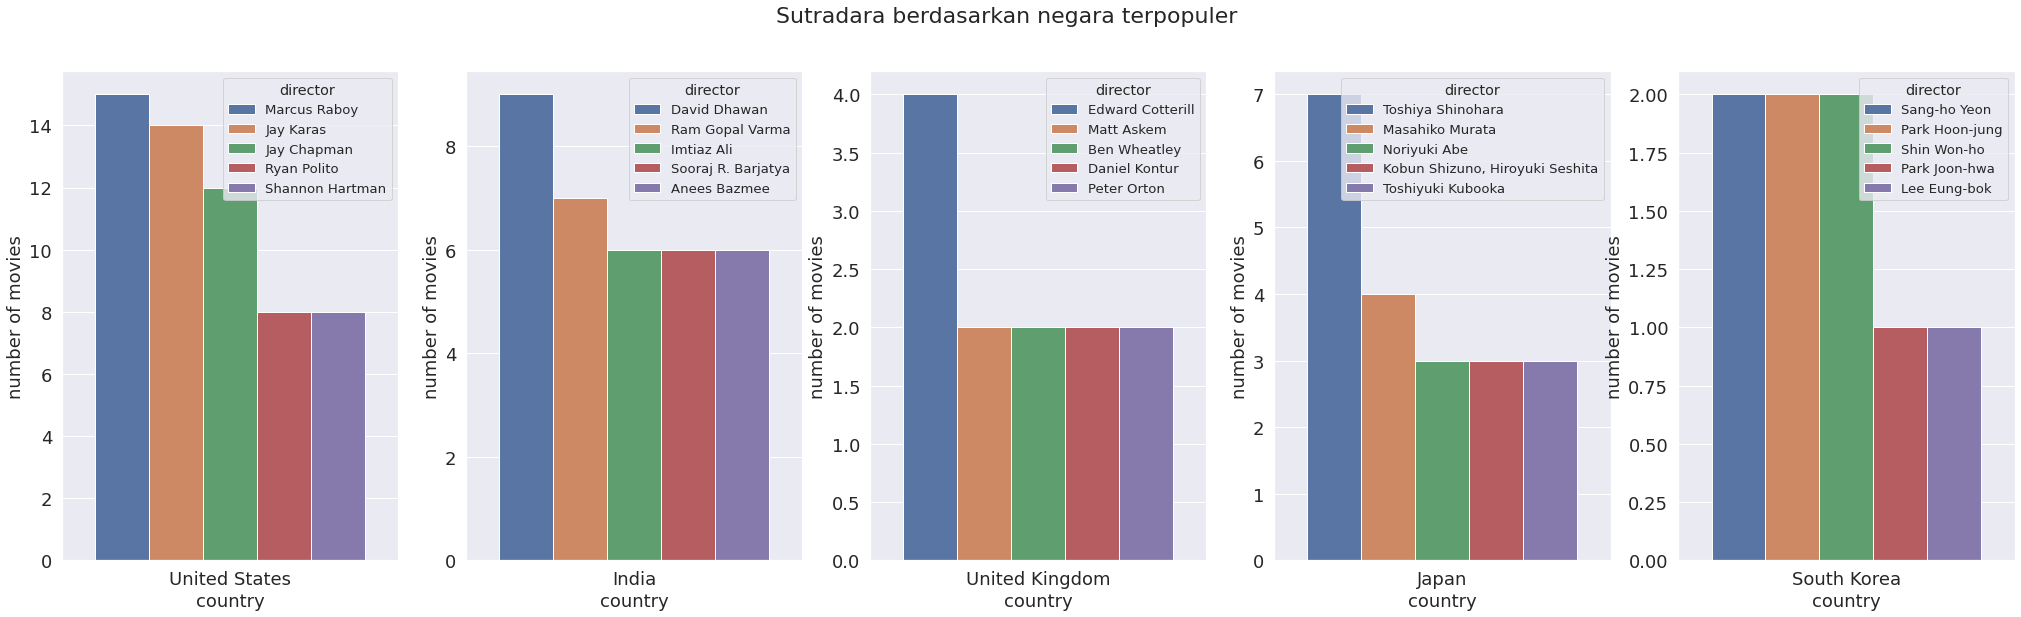

In [ ]:
sns.set_theme(style="darkgrid")
sns.set(font_scale=1.2)
plt.rc('xtick', labelsize=18) 
plt.rc('ytick', labelsize=18)
fig, axes = plt.subplots(1, 5, figsize=(35, 9), sharey=False)
fig.suptitle('Sutradara berdasarkan negara terpopuler',fontsize=22)
sns.barplot(ax=axes[0], x="country", y="number of movies", hue="director", data=us)
axes[0].set_xlabel("country",fontsize=18)
axes[0].set_ylabel("number of movies",fontsize=18)
sns.barplot(ax=axes[1], x="country", y="number of movies", hue="director", data=ind)
axes[1].set_xlabel("country",fontsize=18)
axes[1].set_ylabel("number of movies",fontsize=18)
sns.barplot(ax=axes[2], x="country", y="number of movies", hue="director", data=uk)
axes[2].set_xlabel("country",fontsize=18)
axes[2].set_ylabel("number of movies",fontsize=18)
sns.barplot(ax=axes[3], x="country", y="number of movies", hue="director", data=jpn)
axes[3].set_xlabel("country",fontsize=18)
axes[3].set_ylabel("number of movies",fontsize=18)
sns.barplot(ax=axes[4], x="country", y="number of movies", hue="director", data=sk)
axes[4].set_xlabel("country",fontsize=18)
axes[4].set_ylabel("number of movies",fontsize=18)

Pada diagram di atas merupakan daftar lima sutradara dengan jumlah film terbanyak dari setiap negara populer, kecuali sutradara yang anonymous (tidak diketahui).

# **D. Klasifikasi film berdasarkan umur**

*   TV-Y (All Children)
*   TV-Y7 (Directed To Older Children)
*   TV-G (General Audience)
*   TV-PG (Parental Guidance Suggested)
*   TV-14 (Parents Strongly Cautioned)
*   TV-MA (Mature Audiences Only)
*   R(Restricted, Children Under 17 Require Accompanying Parent or Adult Guardian)
*   G(Appropriate for people of all ages)
*   NR(Notrated)
*   UR(Unrated)
*   NC-17(No Children 17 and under)
*   PG(Parental Guidance)













## D.1 Visualisasi jumlah film berdasarkan rating umur

Pertama memvisualisasikan total rating secara general.
Didapatkan rating dewasa paling dominan. Tetapi, belum diketahui berdasarkan tipenya.

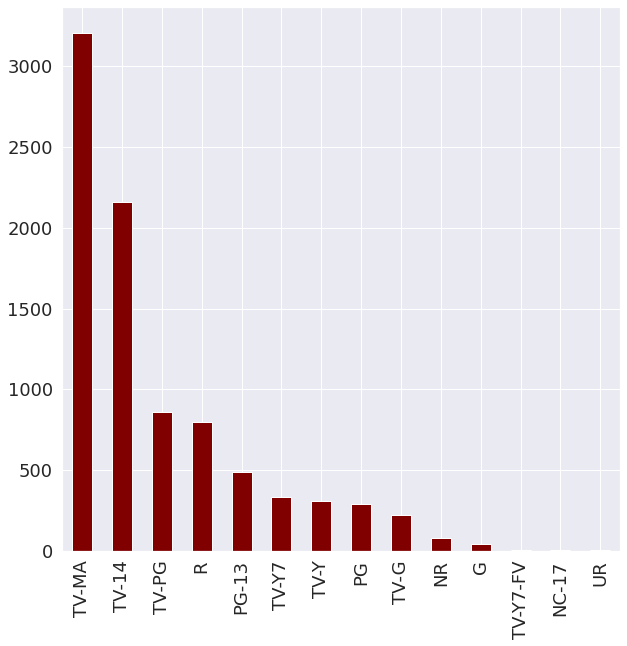

In [ ]:
df.rating.value_counts().plot(kind='bar', color = 'maroon',fontsize = 18, figsize = (10,10) )
plt.show()

Setelah mendapatkan hasil dari visualisasi yang pertama, dikarenakan film ada 2 tipe 
jadi perlu juga untuk membandingkan antara movie dan tv show.

## D.2 Perbandingan rating film berdasarkan tipe dari tahun ke tahun

Pada proses ini, kita membuat tabel untuk melihat jumlah antara Movie/Tv show berdasarkan klasifikasi Usia.

In [ ]:
rating = df.groupby([df['type'],df['rating']])[['rating']].aggregate('count')
rating.rename(columns = {'rating':'count'}, inplace = True)
rating.sort_values(by='count', ascending=False).head(10) 

count
type    rating       
Movie   TV-MA    2062
        TV-14    1427
TV Show TV-MA    1143
Movie   R         797
TV Show TV-14     730
Movie   TV-PG     540
        PG-13     490
TV Show TV-PG     321
Movie   PG        287
TV Show TV-Y7     194

In [ ]:
pivot = rating.pivot_table(values='count', index='type', columns='rating', aggfunc='first')
pivot

rating,G,NC-17,NR,PG,PG-13,R,TV-14,TV-G,TV-MA,TV-PG,TV-Y,TV-Y7,TV-Y7-FV,UR
type,,,,,,,,,,,,,,
Movie,41.0,3.0,75.0,287.0,490.0,797.0,1427.0,126.0,2062.0,540.0,131.0,139.0,5.0,3.0
TV Show,NaN,NaN,4.0,NaN,NaN,2.0,730.0,94.0,1143.0,321.0,175.0,194.0,1.0,NaN


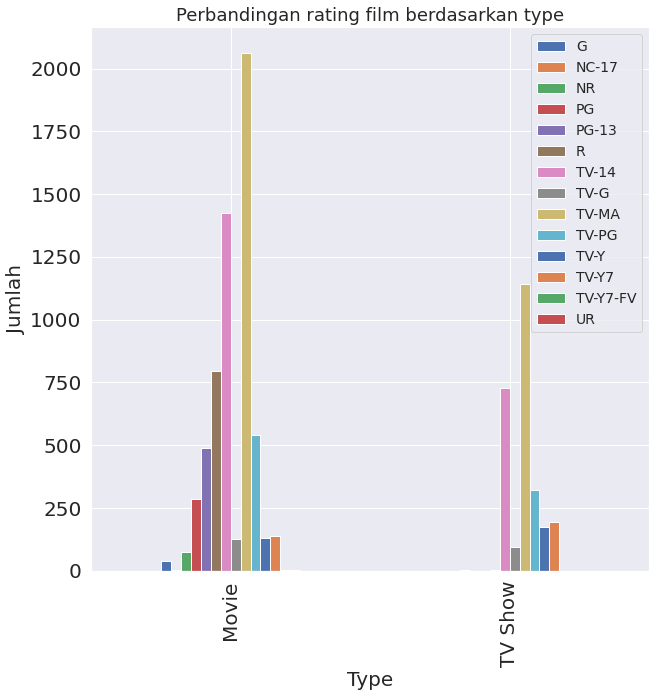

In [ ]:
pivot.plot(kind='bar',fontsize = 20 ,figsize=(10,10), legend =True)
plt.legend(fontsize=14)
plt.title('Perbandingan rating film berdasarkan type',fontsize=18)
plt.ylabel('Jumlah',fontsize = 20)
plt.xlabel('Type',fontsize = 20)
plt.show()

Pada visualisasi tersebut dapat dilihat bahwa TV-Show dan Movie paling banyak membuat film untuk orang dewasa.

## D.3 Klasifikasi film berdasarkan umur

Di sini kita dapat melihat gambaran dari masing-masing klasifikasi film.

### D.3.1 Film Dewasa

In [ ]:
Dewasa_movie = df[(df["type"] == "Movie") & (df["rating"] == "TV-MA")]
Dewasa_movie.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_added_year
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,2021
16,s17,Movie,Europe's Most Dangerous Man: Otto Skorzeny in ...,"Pedro de Echave García, Pablo Azorín Williams",Anonymous,Anonymous,"September 22, 2021",2020,TV-MA,67 min,"Documentaries, International Movies",Declassified documents reveal the post-WWII li...,2021
35,s36,Movie,The Father Who Moves Mountains,Daniel Sandu,"Adrian Titieni, Elena Purea, Judith State, Val...",Anonymous,"September 17, 2021",2021,TV-MA,110 min,"Dramas, International Movies, Thrillers",When his son goes missing during a snowy hike ...,2021
36,s37,Movie,The Stronghold,Cédric Jimenez,"Gilles Lellouche, Karim Leklou, François Civil...",Anonymous,"September 17, 2021",2021,TV-MA,105 min,"Action & Adventure, Dramas, International Movies","Tired of the small-time grind, three Marseille...",2021


In [ ]:
Dewasa_tv = df[(df["type"] == "TV Show") & (df["rating"] == "TV-MA")]
Dewasa_tv.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_added_year
1,s2,TV Show,Blood & Water,Anonymous,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Anonymous,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021
3,s4,TV Show,Jailbirds New Orleans,Anonymous,Anonymous,Anonymous,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021
4,s5,TV Show,Kota Factory,Anonymous,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",Anonymous,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,2021


### D.3.2 Film Remaja

In [ ]:
remaja_movie = df[(df["type"] == "Movie") & ((df["rating"] == "TV-14") | (df["rating"] == "PG") |(df["rating"] == "R") |(df["rating"] == "NC-17"))]
remaja_movie.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_added_year
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Anonymous,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,2021
18,s19,Movie,Intrusion,Adam Salky,"Freida Pinto, Logan Marshall-Green, Robert Joh...",Anonymous,"September 22, 2021",2021,TV-14,94 min,Thrillers,After a deadly home invasion at a couple’s new...,2021
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...,2021
30,s31,Movie,Ankahi Kahaniya,"Ashwiny Iyer Tiwari, Abhishek Chaubey, Saket C...","Abhishek Banerjee, Rinku Rajguru, Delzad Hiwal...",Anonymous,"September 17, 2021",2021,TV-14,111 min,"Dramas, Independent Movies, International Movies","As big city life buzzes around them, lonely so...",2021
41,s42,Movie,Jaws,Steven Spielberg,"Roy Scheider, Robert Shaw, Richard Dreyfuss, L...",United States,"September 16, 2021",1975,PG,124 min,"Action & Adventure, Classic Movies, Dramas",When an insatiable great white shark terrorize...,2021


In [ ]:
remaja_tv = df[(df["type"] == "TV Show") & ((df["rating"] == "TV-14") | (df["rating"] == "PG") |(df["rating"] == "R") |(df["rating"] == "NC-17"))]
remaja_tv.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_added_year
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,2021
20,s21,TV Show,Monsters Inside: The 24 Faces of Billy Milligan,Olivier Megaton,Anonymous,Anonymous,"September 22, 2021",2021,TV-14,1 Season,"Crime TV Shows, Docuseries, International TV S...","In the late 1970s, an accused serial rapist cl...",2021
21,s22,TV Show,Resurrection: Ertugrul,Anonymous,"Engin Altan Düzyatan, Serdar Gökhan, Hülya Dar...",Turkey,"September 22, 2021",2018,TV-14,5 Seasons,"International TV Shows, TV Action & Adventure,...",When a good deed unwittingly endangers his cla...,2021
25,s26,TV Show,Love on the Spectrum,Anonymous,Brooke Satchwell,Australia,"September 21, 2021",2021,TV-14,2 Seasons,"Docuseries, International TV Shows, Reality TV",Finding love can be hard for anyone. For young...,2021
76,s77,TV Show,Yowamushi Pedal,Anonymous,"Daiki Yamashita, Kohsuke Toriumi, Jun Fukushim...",Japan,"September 14, 2021",2013,TV-14,1 Season,"Anime Series, International TV Shows","A timid, anime-loving teen gets drawn into a s...",2021


### D.3.3 Film Anak-anak

In [ ]:
anak_movie = df[(df["type"] == "Movie") & ((df["rating"] == "TV-Y") | (df["rating"] == "TV-Y7"))]
anak_movie.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_added_year
23,s24,Movie,Go! Go! Cory Carson: Chrissy Takes the Wheel,"Alex Woo, Stanley Moore","Maisie Benson, Paul Killam, Kerry Gudjohnsen, ...",Anonymous,"September 21, 2021",2021,TV-Y,61 min,Children & Family Movies,From arcade games to sled days and hiccup cure...,2021
71,s72,Movie,A StoryBots Space Adventure,David A. Vargas,"Evan Spiridellis, Erin Fitzgerald, Jeff Gill, ...",Anonymous,"September 14, 2021",2021,TV-Y,13 min,Children & Family Movies,Join the StoryBots and the space travelers of ...,2021
77,s78,Movie,Little Singham - Black Shadow,Prakash Satam,"Sumriddhi Shukla, Jigna Bharadwaj, Sonal Kaush...",Anonymous,"September 11, 2021",2021,TV-Y7,48 min,"Children & Family Movies, Comedies",Kid cop Little Singham loses all his superpowe...,2021
80,s81,Movie,Firedrake the Silver Dragon,Tomer Eshed,"Thomas Brodie-Sangster, Felicity Jones, Freddi...",Anonymous,"September 10, 2021",2021,TV-Y7,93 min,Children & Family Movies,"When his home is threatened by humans, a young...",2021
130,s131,Movie,Barbie Big City Big Dreams,Scott Pleydell-Pearce,"America Young, Amber May, Giselle Fernandez, A...",Anonymous,"September 1, 2021",2021,TV-Y,63 min,"Children & Family Movies, Music & Musicals",At a summer performing arts program in New Yor...,2021


In [ ]:
anak_tv = df[(df["type"] == "TV Show") & ((df["rating"] == "TV-Y") | (df["rating"] == "TV-Y7"))]
anak_tv.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_added_year
34,s35,TV Show,Tayo and Little Wizards,Anonymous,"Dami Lee, Jason Lee, Bommie Catherine Han, Jen...",Anonymous,"September 17, 2021",2020,TV-Y7,1 Season,Kids' TV,Tayo speeds into an adventure when his friends...,2021
37,s38,TV Show,Angry Birds,Anonymous,"Antti Pääkkönen, Heljä Heikkinen, Lynne Guagli...",Finland,"September 16, 2021",2018,TV-Y7,1 Season,"Kids' TV, TV Comedies","Birds Red, Chuck and their feathered friends h...",2021
39,s40,TV Show,Chhota Bheem,Anonymous,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",India,"September 16, 2021",2021,TV-Y7,3 Seasons,Kids' TV,"A brave, energetic little boy with superhuman ...",2021
40,s41,TV Show,He-Man and the Masters of the Universe,Anonymous,"Yuri Lowenthal, Kimberly Brooks, Antony Del Ri...",United States,"September 16, 2021",2021,TV-Y7,1 Season,"Kids' TV, TV Sci-Fi & Fantasy",Mighty teen Adam and his heroic squad of misfi...,2021
65,s66,TV Show,Numberblocks,Anonymous,"Beth Chalmers, David Holt, Marcel McCalla, Ter...",United Kingdom,"September 15, 2021",2021,TV-Y,6 Seasons,Kids' TV,"In a place called Numberland, math adds up to ...",2021


### D.3.4 Film Semua umur

In [ ]:
semua_umur_movie = df[(df["type"] == "Movie") & ((df["rating"] == "G") | (df["rating"] == "TV-G"))]
semua_umur_movie.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_added_year
75,s76,Movie,You vs. Wild: Out Cold,Ben Simms,"Bear Grylls, Jason Derek Prempeh",Anonymous,"September 14, 2021",2021,TV-G,106 min,Children & Family Movies,"After a plane crash leaves Bear with amnesia, ...",2021
107,s108,Movie,A Champion Heart,David de Vos,"Mandy Grace, David de Vos, Donna Rusch, Devan ...",United States,"September 4, 2021",2018,G,90 min,"Children & Family Movies, Dramas",When a grieving teen must work off her debt to...,2021
428,s429,Movie,Words Bubble Up Like Soda Pop,Kyohei Ishiguro,"Somegoro Ichikawa, Hana Sugisaki, Megumi Han, ...",Anonymous,"July 22, 2021",2021,TV-G,87 min,"Anime Features, Children & Family Movies, Inte...","After meeting one bright, sunny day, a shy boy...",2021
484,s485,Movie,Lee Su-geun: The Sense Coach,Kim Joo-hyung,Lee Su-geun,Anonymous,"July 9, 2021",2021,TV-G,46 min,Stand-Up Comedy,Lee Su-geun's rise to Korean comedy stardom we...,2021
506,s507,Movie,This Little Love Of Mine,Christine Luby,"Saskia Hampele, Liam McIntyre, Lynn Gilmartin,...",Australia,"July 7, 2021",2021,TV-G,92 min,"International Movies, Romantic Movies",A workaholic lawyer returns to her island home...,2021


In [ ]:
semua_umur_tv = df[(df["type"] == "TV Show") & ((df["rating"] == "G") | (df["rating"] == "TV-G"))]
semua_umur_tv.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_added_year
66,s67,TV Show,Raja Rasoi Aur Anya Kahaniyan,Anonymous,Anonymous,India,"September 15, 2021",2014,TV-G,1 Season,"Docuseries, International TV Shows",Explore the history and flavors of regional In...,2021
106,s107,TV Show,Bunk'd,Anonymous,"Peyton List, Karan Brar, Skai Jackson, Miranda...",United States,"September 5, 2021",2021,TV-G,5 Seasons,"Kids' TV, TV Comedies","The Ross siblings of Disney's hit series ""Jess...",2021
108,s109,TV Show,Dive Club,Anonymous,"Aubri Ibrag, Sana'a Shaik, Miah Madden, Mercy ...",Australia,"September 3, 2021",2021,TV-G,1 Season,"Kids' TV, TV Dramas, Teen TV Shows","On the shores of Cape Mercy, a skillful group ...",2021
187,s188,TV Show,The Ingenuity of the Househusband,Anonymous,Kenjiro Tsuda,Anonymous,"August 29, 2021",2021,TV-G,1 Season,"International TV Shows, TV Comedies",A tough guy with a knack for housework tackles...,2021
232,s233,TV Show,Wheel of Fortune,Anonymous,"Pat Sajak, Vanna White",United States,"August 25, 2021",2019,TV-G,3 Seasons,Reality TV,Pat Sajak and Vanna White host one of TV's mos...,2021


## D.4 Klasifikasi film berdasarkan director dan rating umur

Dari klasifikasi berdasarkan umur, kita akan melihat sutradara siapa saja yang sering membuat film berdasarkan klasifikasi umur tersebut.

Pertama kita mengelompokkan terlebih dahulu berdasarkan type, director dan rating.

In [ ]:
rating_umur = df.groupby([df['type'],df['director'],df['rating']])[['rating']].aggregate('count')
rating_umur.rename(columns = {'rating':'number of rating'}, inplace = True)
rating_umur.reset_index(inplace = True)
rating_umur

,type,director,rating,number of rating
0,Movie,A. L. Vijay,TV-14,2
1,Movie,A. Raajdheep,TV-14,1
2,Movie,A. Salaam,TV-14,1
3,Movie,A.R. Murugadoss,TV-14,1
4,Movie,A.R. Murugadoss,TV-MA,1
...,...,...,...,...
5194,TV Show,Vijay S. Bhanushali,TV-Y7,1
5195,TV Show,"Vikramaditya Motwane, Anurag Kashyap",TV-MA,1
5196,TV Show,Wouter Bouvijn,TV-MA,1
5197,TV Show,Yasuhiro Irie,TV-14,1


Director yang tidak diketahui dihapus.

In [ ]:
rating_umur.drop(rating_umur[rating_umur['director']=='Anonymous'].index, inplace=True)

Kemudian, menampilkan secara urut director yang memproduksi film paling banyak berdasarkan rating.

In [ ]:
rating_umur.sort_values(by='number of rating', ascending=False).head(10) 

,type,director,rating,number of rating
3753,Movie,"Raúl Campos, Jan Suter",TV-MA,17
3692,Movie,Rajiv Chilaka,TV-Y7,17
2826,Movie,Marcus Raboy,TV-MA,12
4432,Movie,Suhas Kadav,TV-Y7,12
1946,Movie,Jay Chapman,TV-MA,10
1951,Movie,Jay Karas,TV-MA,10
2905,Movie,Martin Scorsese,R,8
2552,Movie,Lance Bangs,TV-MA,7
4211,Movie,Shannon Hartman,TV-MA,7
4912,Movie,Youssef Chahine,TV-MA,7


### D.4.1 Sutradara paling banyak membuat film dengan rating dewasa

In [ ]:
rating_dewasa_movie = rating_umur[(rating_umur['rating'] == 'TV-MA') & (rating_umur['type'] == 'Movie')]
d_m = rating_dewasa_movie.sort_values(by='number of rating', ascending=False).head(5)
d_m

,type,director,rating,number of rating
3753,Movie,"Raúl Campos, Jan Suter",TV-MA,17
2826,Movie,Marcus Raboy,TV-MA,12
1951,Movie,Jay Karas,TV-MA,10
1946,Movie,Jay Chapman,TV-MA,10
2552,Movie,Lance Bangs,TV-MA,7


In [ ]:
recomendation_movie = df[(df["type"] == "Movie") & (df["director"] == "Raúl Campos, Jan Suter") & (df["rating"] == "TV-MA")]
recomendation_movie.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_added_year
4749,s4750,Movie,Coco y Raulito: Carrusel de ternura,"Raúl Campos, Jan Suter","Coco Celis, Raúl Meneses",Mexico,"July 27, 2018",2018,TV-MA,57 min,Stand-Up Comedy,"A study in contrasts, comedy partners and good...",2018
4808,s4809,Movie,Jani Dueñas: Grandes fracasos de ayer y hoy,"Raúl Campos, Jan Suter",Jani Dueñas,Chile,"June 29, 2018",2018,TV-MA,77 min,Stand-Up Comedy,Chilean comedian and personality Jani Dueñas p...,2018
4849,s4850,Movie,Fernando Sanjiao: Hombre,"Raúl Campos, Jan Suter",Fernando Sanjiao,Argentina,"May 25, 2018",2018,TV-MA,63 min,Stand-Up Comedy,Argentine actor and comedian Fernando Sanjiao ...,2018
4866,s4867,Movie,Carlos Ballarta: Furia Ñera,"Raúl Campos, Jan Suter",Carlos Ballarta,Mexico,"May 11, 2018",2018,TV-MA,63 min,Stand-Up Comedy,Mexican comic Carlos Ballarta mocks himself an...,2018
4940,s4941,Movie,Todo lo que sería Lucas Lauriente,"Raúl Campos, Jan Suter",Lucas Lauriente,Argentina,"April 6, 2018",2018,TV-MA,78 min,Stand-Up Comedy,"In his stand-up set, Argentine comic Lucas Lau...",2018


In [ ]:
rating_dewasa_show = rating_umur[(rating_umur['rating'] == 'TV-MA') & (rating_umur['type'] == 'TV Show')]
d_tv = rating_dewasa_show.sort_values(by='number of rating', ascending=False).head(5)
d_tv

,type,director,rating,number of rating
5164,TV Show,Shin Won-ho,TV-MA,2
5171,TV Show,Stan Lathan,TV-MA,2
4966,TV Show,"Adrien Lagier, Ousmane Ly",TV-MA,1
5117,TV Show,Michael Samuels,TV-MA,1
5140,TV Show,Pass Patthanakumjon,TV-MA,1


In [ ]:
recomendation_series = df[(df["type"] == "TV Show") & (df["director"] == "Shin Won-ho") & (df["rating"] == "TV-MA")]
recomendation_series.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_added_year
3613,s3614,TV Show,Reply 1994,Shin Won-ho,"Go Ara, Jung Woo, Sung Dong-il, Dohee, Son Ho-...",South Korea,"August 8, 2019",2014,TV-MA,1 Season,"International TV Shows, Korean TV Shows, Roman...","All hailing from various parts of Korea, a gro...",2019
3614,s3615,TV Show,Reply 1997,Shin Won-ho,"Jung Eun-ji, Seo In-guk, Shin So-yul, Ji-won E...",South Korea,"August 8, 2019",2012,TV-MA,1 Season,"International TV Shows, Korean TV Shows, Roman...","As a teen, Shi Won was obsessed with a boy ban...",2019


### D.4.2 Sutradara paling banyak mebuat film dengan rating anak-anak

In [ ]:
rating_anak_movie = rating_umur[((rating_umur["rating"] == "TV-Y") | (rating_umur["rating"] == "TV-Y7")) & (rating_umur['type'] == 'Movie')]
c_m = rating_anak_movie.sort_values(by='number of rating', ascending=False).head(5)
c_m

,type,director,rating,number of rating
3692,Movie,Rajiv Chilaka,TV-Y7,17
4432,Movie,Suhas Kadav,TV-Y7,12
3614,Movie,Prakash Satam,TV-Y7,6
2108,Movie,Joey So,TV-Y,6
4370,Movie,Steve Ball,TV-Y,4


In [ ]:
recomendation_anak_movie = df[(df["type"] == "Movie") & (df["director"] == "Rajiv Chilaka") & ((df["rating"] == "TV-Y") | (df["rating"] == "TV-Y7"))]
recomendation_anak_movie.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_added_year
406,s407,Movie,Chhota Bheem - Neeli Pahaadi,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",Anonymous,"July 22, 2021",2013,TV-Y7,64 min,Children & Family Movies,Things get spooky when Bheem and his buddies t...,2021
407,s408,Movie,Chhota Bheem & Ganesh,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",Anonymous,"July 22, 2021",2009,TV-Y7,68 min,Children & Family Movies,Bheem and Lord Ganesha join forces to save Dho...,2021
408,s409,Movie,Chhota Bheem & Krishna: Mayanagari,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",Anonymous,"July 22, 2021",2011,TV-Y7,67 min,Children & Family Movies,Young lord Krishna has fallen for demoness Maa...,2021
409,s410,Movie,Chhota Bheem & Krishna: Pataliputra- City of t...,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",Anonymous,"July 22, 2021",2010,TV-Y7,66 min,Children & Family Movies,Krishna needs Bheem’s help: The ruined city of...,2021
410,s411,Movie,Chhota Bheem And The Broken Amulet,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",India,"July 22, 2021",2013,TV-Y7,64 min,Children & Family Movies,When a stranger tries to steal an amulet from ...,2021


In [ ]:
rating_anak_tv = rating_umur[((rating_umur["rating"] == "TV-Y") | (rating_umur["rating"] == "TV-Y7")) & (rating_umur['type'] == 'TV Show')]
c_tv = rating_anak_tv.sort_values(by='number of rating', ascending=False).head(5)
c_tv

,type,director,rating,number of rating
5050,TV Show,Iginio Straffi,TV-Y7,2
4968,TV Show,Ah Loong,TV-Y7,1
4980,TV Show,"Andrew Tan, Stephen Murray",TV-Y,1
4995,TV Show,Bhavik Thakore,TV-Y,1
5022,TV Show,Dheeraj Berry,TV-Y7,1


In [ ]:
recomendation_anak_tv = df[(df["type"] == "TV Show") & (df["director"] == "Iginio Straffi") & ((df["rating"] == "TV-Y") | (df["rating"] == "TV-Y7"))]
recomendation_anak_tv

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_added_year
5428,s5429,TV Show,World of Winx,Iginio Straffi,"Haven Paschall, Alysha Deslorieux, Jessica Paq...","Italy, United States","June 16, 2017",2017,TV-Y7,2 Seasons,Kids' TV,"The reality show ""WOW!"" engages the Winx in th...",2017
7375,s7376,TV Show,Maggie & Bianca: Fashion Friends,Iginio Straffi,"Emanuela Rei, Giorgia Boni, Sergio Ruggeri, Lu...",Italy,"March 31, 2019",2017,TV-Y7,1 Season,"Kids' TV, TV Comedies","Originally polar opposites, an American fashio...",2019


### D.4.3 Sutradara paling banyak mebuat film dengan rating semua umur

In [ ]:
rating_semua_umur_movie = rating_umur[((rating_umur["rating"] == "G") | (rating_umur["rating"] == "TV-G")) & (rating_umur['type'] == 'Movie')]
all_m = rating_semua_umur_movie.sort_values(by='number of rating', ascending=False).head(5)
all_m

,type,director,rating,number of rating
2684,Movie,Lucas Margutti,TV-G,3
4125,Movie,Savage Steve Holland,TV-G,2
3709,Movie,Rako Prijanto,TV-G,2
1603,Movie,Greg MacGillivray,TV-G,2
4308,Movie,Sooraj R. Barjatya,TV-G,2


In [ ]:
recomendation_semua_umur_movie = df[(df["type"] == "Movie") & (df["director"] == "Lucas Margutti") & ((df["rating"] == "G") | (df["rating"] == "TV-G"))]
recomendation_semua_umur_movie

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_added_year
2563,s2564,Movie,Luccas Neto em: Acampamento de Férias 2,Lucas Margutti,"Luccas Neto, Giovanna Alparone, Jéssica Diehl,...",Brazil,"May 4, 2020",2020,TV-G,81 min,"Children & Family Movies, Comedies, Music & Mu...",Luccas and his band of buddies make music and ...,2020
3064,s3065,Movie,Luccas Neto in: Children's Day,Lucas Margutti,"Luccas Neto, Vivian Duarte, Giobanna Alparone,...",Anonymous,"January 1, 2020",2019,TV-G,81 min,"Children & Family Movies, Comedies, Music & Mu...",When Luccas Neto plans a big Children's Day ce...,2020
3303,s3304,Movie,Luccas Neto in: Summer Camp,Lucas Margutti,"Luccas Neto, Gi Alparone, Jéssica Diehl, Roni ...",Brazil,"November 5, 2019",2019,TV-G,87 min,"Children & Family Movies, Comedies, Music & Mu...",Luccas and Gi are heading to a world famous gy...,2019


In [ ]:
rating_semua_umur_tv = rating_umur[((rating_umur["rating"] == "G") | (rating_umur["rating"] == "TV-G")) & (rating_umur['type'] == 'TV Show')]
all_tv = rating_semua_umur_tv.sort_values(by='number of rating', ascending=False).head(5)
all_tv

,type,director,rating,number of rating
4971,TV Show,Alastair Fothergill,TV-G,1
5087,TV Show,Kenny Ortega,TV-G,1
5118,TV Show,Michael Simon,TV-G,1
5151,TV Show,Rachel Bell,TV-G,1


In [ ]:
recomendation_semua_umur_tv = df[(df["type"] == "TV Show") & (df["director"] == "Alastair Fothergill") & ((df["rating"] == "G") | (df["rating"] == "TV-G"))]
recomendation_semua_umur_tv

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_added_year
8214,s8215,TV Show,The Blue Planet: A Natural History of the Oceans,Alastair Fothergill,David Attenborough,United Kingdom,"October 10, 2015",2001,TV-G,1 Season,"British TV Shows, Docuseries, International TV...",David Attenborough narrates this definitive ex...,2015


### D.4.4 Sutradara paling banyak mebuat film dengan rating remaja

In [ ]:
rating_remaja_umur_movie = rating_umur[((rating_umur["rating"] == "TV-14") | (rating_umur["rating"] == "PG") |(rating_umur["rating"] == "R") |(rating_umur["rating"] == "NC-17")) & (rating_umur['type'] == 'Movie')]
r_m = rating_remaja_umur_movie.sort_values(by='number of rating', ascending=False).head(5)
r_m

,type,director,rating,number of rating
2905,Movie,Martin Scorsese,R,8
3880,Movie,Robert Rodriguez,PG,7
754,Movie,Cathy Garcia-Molina,TV-14,7
2528,Movie,Kunle Afolayan,TV-14,7
3642,Movie,Quentin Tarantino,R,7


In [ ]:
recomendation_remaja_movie = df[(df["type"] == "Movie") & (df["director"] == "Martin Scorsese") & ((df["rating"] == "TV-14") | (df["rating"] == "PG") |(df["rating"] == "R") |(df["rating"] == "NC-17"))]
recomendation_remaja_movie

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_added_year
1358,s1359,Movie,Shutter Island,Martin Scorsese,"Leonardo DiCaprio, Mark Ruffalo, Ben Kingsley,...",United States,"February 1, 2021",2010,R,139 min,Thrillers,A U.S. marshal's troubling visions compromise ...,2021
2860,s2861,Movie,Hugo,Martin Scorsese,"Ben Kingsley, Sacha Baron Cohen, Asa Butterfie...","United Kingdom, United States, France","March 1, 2020",2011,PG,127 min,"Children & Family Movies, Dramas","Living inside a Paris train station, an orphan...",2020
3227,s3228,Movie,The Irishman,Martin Scorsese,"Robert De Niro, Al Pacino, Joe Pesci, Harvey K...",United States,"November 27, 2019",2019,R,209 min,Dramas,Hit man Frank Sheeran looks back at the secret...,2019
6111,s6112,Movie,Alice Doesn't Live Here Anymore,Martin Scorsese,"Ellen Burstyn, Kris Kristofferson, Billy Green...",United States,"July 1, 2019",1974,PG,112 min,"Classic Movies, Comedies, Dramas",A widowed singer and single mother starts over...,2019
6826,s6827,Movie,Gangs of New York,Martin Scorsese,"Leonardo DiCaprio, Daniel Day-Lewis, Cameron D...","United States, Italy","August 20, 2019",2002,R,167 min,Dramas,In the crime-ridden slums of New York in the 1...,2019
6880,s6881,Movie,GoodFellas,Martin Scorsese,"Robert De Niro, Ray Liotta, Joe Pesci, Lorrain...",United States,"January 1, 2021",1990,R,145 min,"Classic Movies, Dramas",Former mobster Henry Hill recounts his colorfu...,2021
7431,s7432,Movie,Mean Streets,Martin Scorsese,"Robert De Niro, Harvey Keitel, David Proval, A...",United States,"July 1, 2019",1973,R,112 min,"Classic Movies, Dramas, Independent Movies","In New York's Little Italy, a low-level hoodlu...",2019
7820,s7821,Movie,Raging Bull,Martin Scorsese,"Robert De Niro, Cathy Moriarty, Joe Pesci, Fra...",United States,"October 1, 2019",1980,R,129 min,"Classic Movies, Dramas, Sports Movies",This gritty biopic of brutal boxer Jake LaMott...,2019
8272,s8273,Movie,The Departed,Martin Scorsese,"Leonardo DiCaprio, Matt Damon, Jack Nicholson,...","United States, Hong Kong","January 1, 2021",2006,R,151 min,"Dramas, Thrillers",Two rookie Boston cops are sent deep undercove...,2021
8735,s8736,Movie,Who's That Knocking at My Door?,Martin Scorsese,"Zina Bethune, Harvey Keitel, Anne Collette, Le...",United States,"July 1, 2019",1967,R,90 min,"Classic Movies, Dramas, Independent Movies",A woman's revelation that she was once raped s...,2019


In [ ]:
rating_remaja_umur_tv = rating_umur[((rating_umur["rating"] == "TV-14") | (rating_umur["rating"] == "PG") |(rating_umur["rating"] == "R") |(rating_umur["rating"] == "NC-17")) & (rating_umur['type'] == 'TV Show')]
r_tv = rating_remaja_umur_tv.sort_values(by='number of rating', ascending=False).head(5)
r_tv

,type,director,rating,number of rating
5048,TV Show,Hsu Fu-chun,TV-14,2
5154,TV Show,Rob Seidenglanz,TV-14,2
4967,TV Show,Adrián García Bogliano,TV-14,1
5137,TV Show,Pali Yahya,TV-14,1
5079,TV Show,Jung-ah Im,TV-14,1


In [ ]:
recomendation_remaja_tv = df[(df["type"] == "TV Show") & (df["director"] == "Hsu Fu-chun") & ((df["rating"] == "TV-14") | (df["rating"] == "PG") |(df["rating"] == "R") |(df["rating"] == "NC-17"))]
recomendation_remaja_tv

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_added_year
316,s317,TV Show,Office Girls,Hsu Fu-chun,"Roy Chiu, Alice Ko, Tia Lee, Patrick Lee, Kuo ...",Taiwan,"August 3, 2021",2011,TV-14,1 Season,"International TV Shows, Romantic TV Shows, TV ...",A department store mogul has his son work inco...,2021
692,s693,TV Show,The Rational Life,Hsu Fu-chun,"Qin Lan, Dylan Wang, Li Zonghan, Bao Wenjing, ...",Anonymous,"June 18, 2021",2021,TV-14,1 Season,"International TV Shows, Romantic TV Shows, TV ...",A career-driven 30-something must contend with...,2021


## D.5 Visualisasi film berdasarkan director dan rating umur

Text(0, 0.5, 'number of rating')

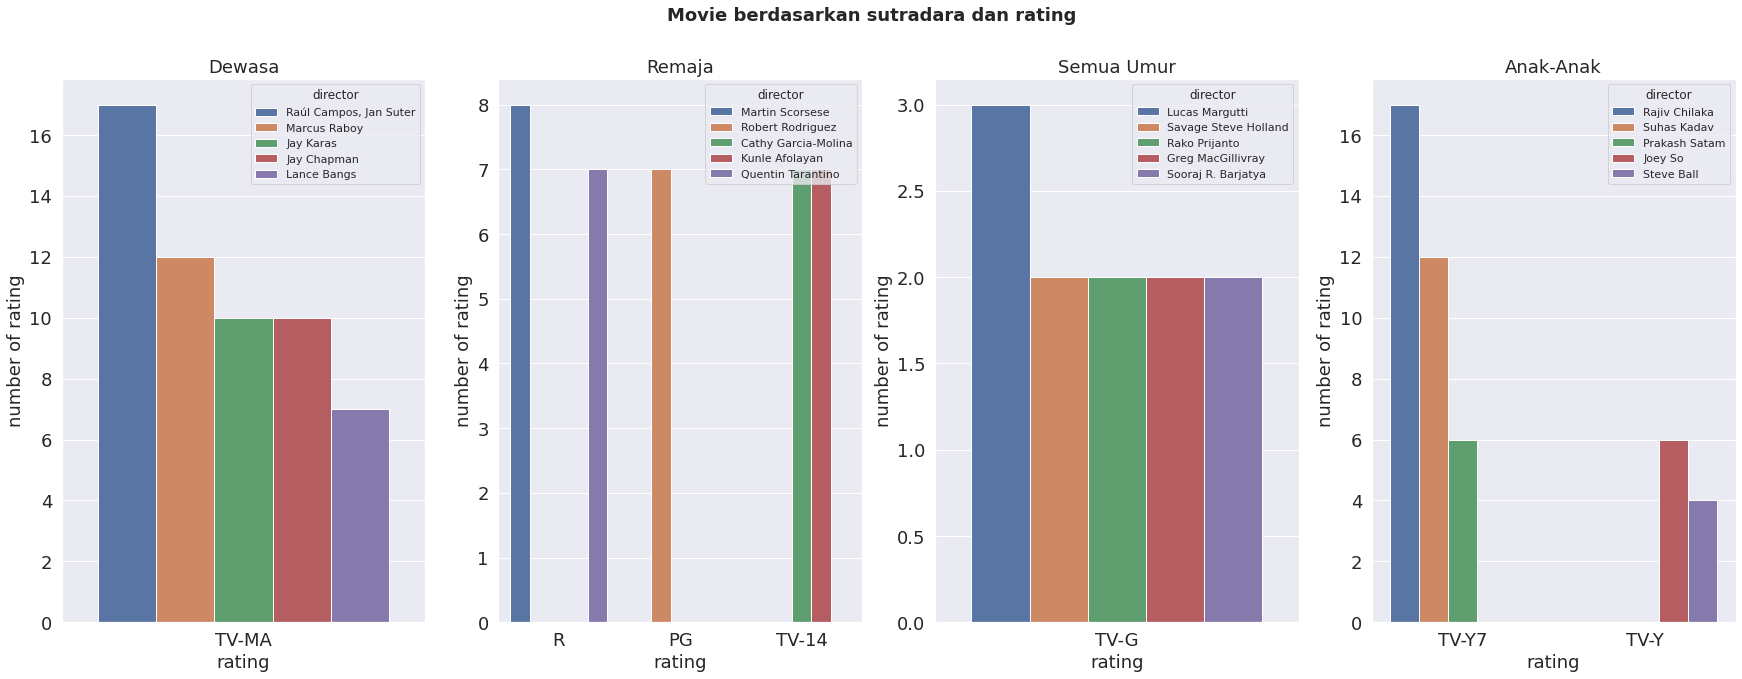

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(30, 10), sharey=False)
sns.set(font_scale=1)
plt.rc('xtick', labelsize=18) 
plt.rc('ytick', labelsize=18) 
fig.suptitle('Movie berdasarkan sutradara dan rating',fontsize=18, fontweight='bold')
sns.barplot(ax=axes[0], x="rating", y="number of rating", hue="director", data=d_m)
axes[0].set_title('Dewasa',fontsize = 18)
axes[0].set_xlabel("rating",fontsize=18)
axes[0].set_ylabel("number of rating",fontsize=18)
sns.barplot(ax=axes[1], x="rating", y="number of rating", hue="director", data=r_m)
axes[1].set_title('Remaja',fontsize = 18)
axes[1].set_xlabel("rating",fontsize=18)
axes[1].set_ylabel("number of rating",fontsize=18)
sns.barplot(ax=axes[2], x="rating", y="number of rating", hue="director", data=all_m)
axes[2].set_title('Semua Umur',fontsize = 18)
axes[2].set_xlabel("rating",fontsize=18)
axes[2].set_ylabel("number of rating",fontsize=18)
sns.barplot(ax=axes[3], x="rating", y="number of rating", hue="director", data=c_m)
axes[3].set_title('Anak-Anak',fontsize = 18)
axes[3].set_xlabel("rating",fontsize=18)
axes[3].set_ylabel("number of rating",fontsize=18)

Berdasarkan diagram di atas, menampilkan 5 sutradara paling banyak memproduksi movie berdasarkan rating. Pada movie kategori orang dewasa,  Raul Campos, dan Jan Suster merupakan sutradara yang paling cocok untuk kategori tersebut. Kemudian, pada kategori Remaja sutradara yang memproduksi movie paling banyak adalah Martin Scorsese. Selanjutnya, sutradara yang paling banyak memproduksi movie untuk kategori semua umur ialah Lucas Margutti. Dan yang terakhir, untuk kategori anak-anak sutradara yang paling cocok ialah Rajiv Chilaka.

Text(0, 0.5, 'number of rating')

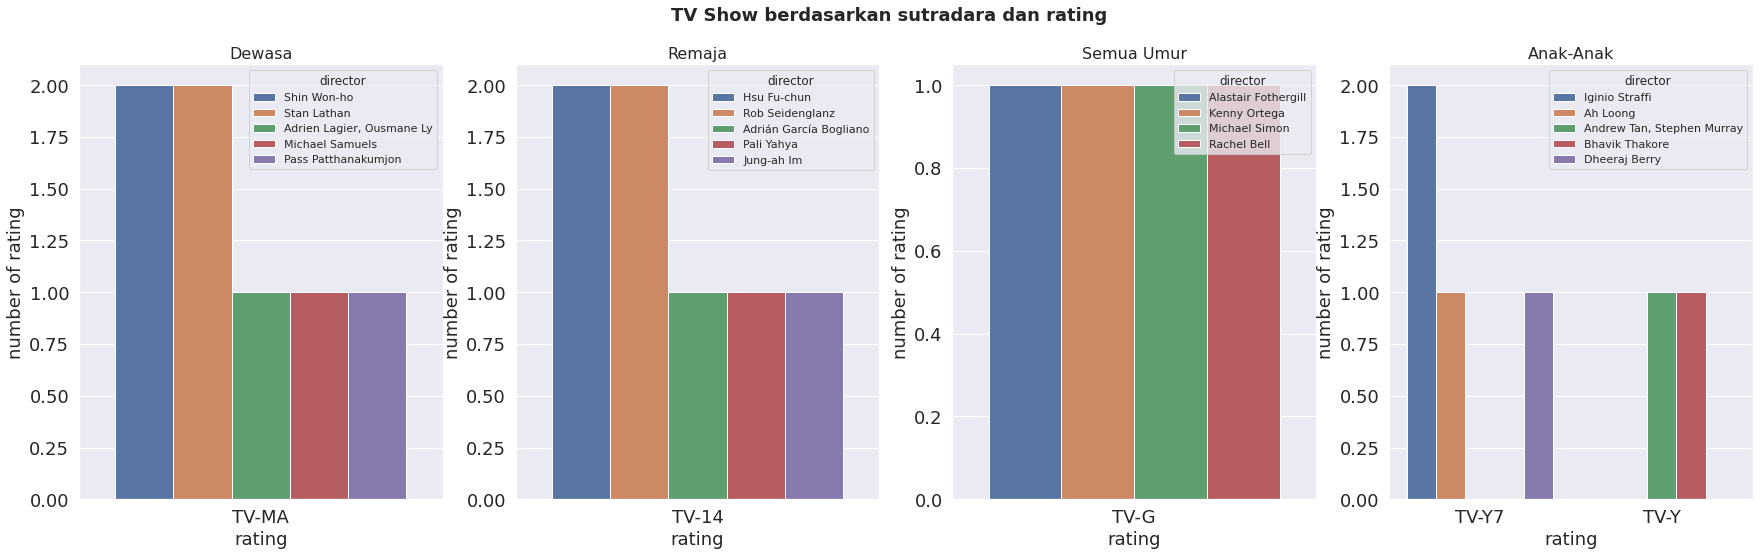

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(30, 8), sharey= False)
sns.set(font_scale=1)
plt.rc('xtick', labelsize=18) 
plt.rc('ytick', labelsize=18) 
fig.suptitle('TV Show berdasarkan sutradara dan rating',fontsize=18, fontweight='bold')
sns.barplot(ax=axes[0], x="rating", y="number of rating", hue="director", data=d_tv)
axes[0].set_title('Dewasa',fontsize = 16)
axes[0].set_xlabel("rating",fontsize=18)
axes[0].set_ylabel("number of rating",fontsize=18)
sns.barplot(ax=axes[1], x="rating", y="number of rating", hue="director", data=r_tv)
axes[1].set_title('Remaja',fontsize = 16)
axes[1].set_xlabel("rating",fontsize=18)
axes[1].set_ylabel("number of rating",fontsize=18)
sns.barplot(ax=axes[2], x="rating", y="number of rating", hue="director", data=all_tv)
axes[2].set_title('Semua Umur',fontsize = 16)
axes[2].set_xlabel("rating",fontsize=18)
axes[2].set_ylabel("number of rating",fontsize=18)
sns.barplot(ax=axes[3], x="rating", y="number of rating", hue="director", data=c_tv)
axes[3].set_title('Anak-Anak',fontsize = 16)
axes[3].set_xlabel("rating",fontsize=18)
axes[3].set_ylabel("number of rating",fontsize=18)

Berdasarkan diagram di atas, menampilkan 5 sutradara paling banyak memproduksi TV Show berdasarkan rating. Pada TV Show kategori orang dewasa,  Shin Won-ho merupakan sutradara yang paling cocok untuk kategori tersebut. Kemudian, pada kategori Remaja sutradara yang memproduksi TV Show paling banyak adalah Hsu Fu-chun. Selanjutnya, sutradara yang paling banyak memproduksi TV Show untuk kategori semua umur ialah Alastair Fothergill. Dan yang terakhir, untuk kategori anak-anak sutradara yang paling cocok ialah Ignio Straffi.

# **E. Durasi film pada netflix**

## E.1. Mengkategorikan durasi film berdasarkan type 

In [ ]:
movies = df[df['type']=='Movie'].copy()
shows = df[df['type']=='TV Show'].copy()

### E.1.1. Movie

In [ ]:
movies["duration"] = movies.duration.str.replace(" min",'').astype(int)

In [ ]:
movies["duration"]

0        90
6        91
7       125
9       104
12      127
       ... 
8801     96
8802    158
8804     88
8805     88
8806    111
Name: duration, Length: 6126, dtype: int64

In [ ]:
movies["duration"].mode()

0    90
dtype: int64

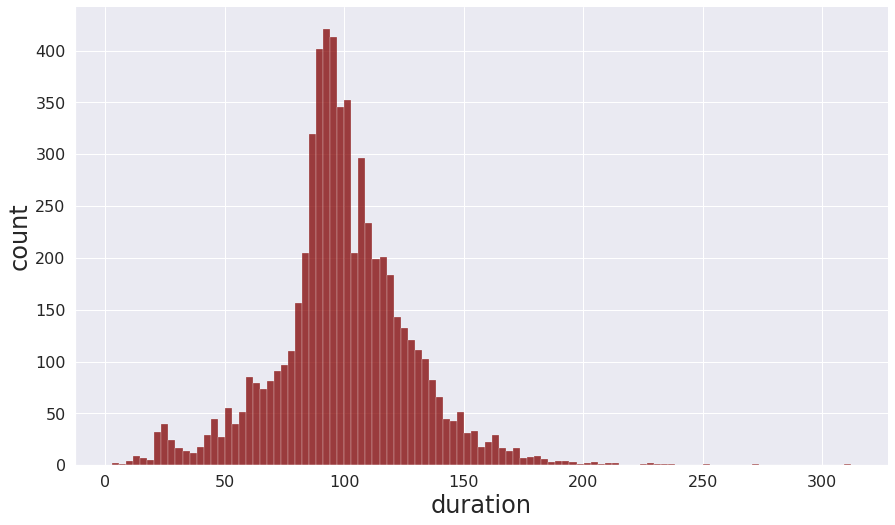

In [ ]:
# plt.figure(figsize=(20,20))
g = sns.displot(movies.duration,color='maroon')
plt.rc('xtick', labelsize=18) 
plt.rc('ytick', labelsize=18)
plt.ylabel('count',fontsize=24)
plt.xlabel('duration',fontsize=24)
g.fig.set_figwidth(15)
g.fig.set_figheight(8)

### E.1.2. TV Show

Pada diagram di atas, film Movies paling banyak diproduksi dengan durasi 90 menit.

In [ ]:
shows.rename(columns={'duration':'season'}, inplace = True)

In [ ]:
shows["season"] = shows.season.str.replace("Season",'')
shows["season"] = shows.season.str.replace("Seasons",'')
shows["season"] = shows.season.str.replace("s",'')
shows['season']=shows['season'].astype('int')
shows.value_counts("season")

season
1     1791
2      421
3      198
4       94
5       64
6       33
7       23
8       17
9        9
10       6
12       2
13       2
15       2
11       1
17       1
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Season')

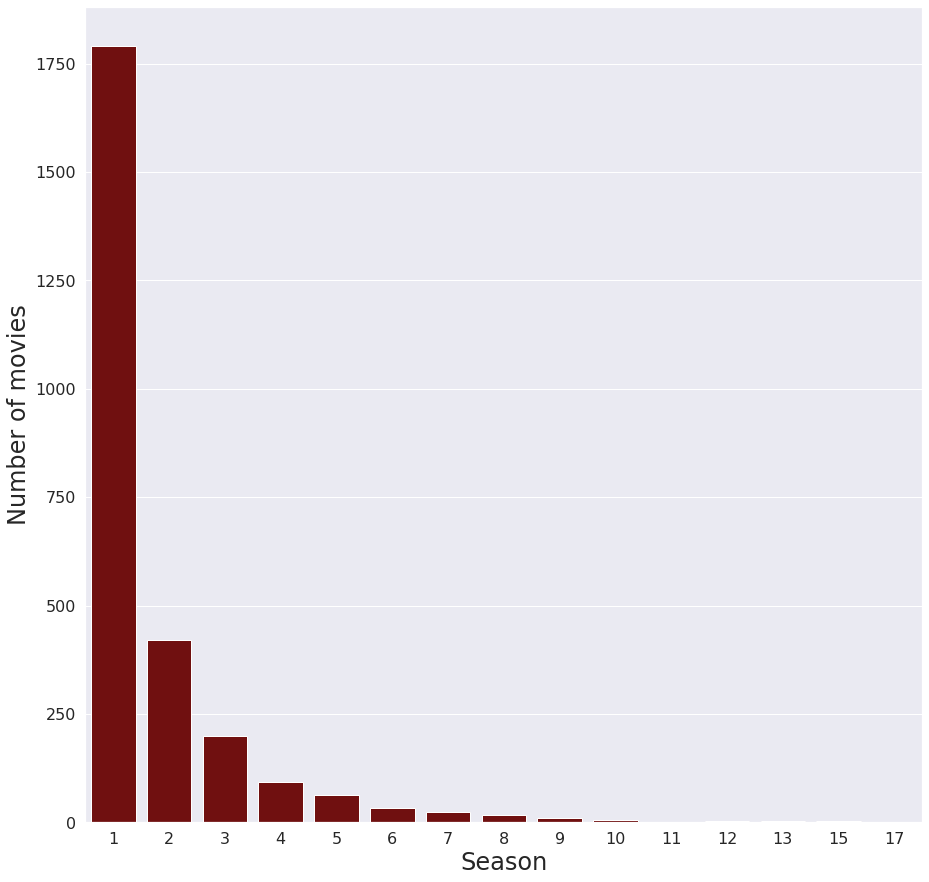

In [ ]:
plt.figure(figsize=(15,15))
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 
sns.countplot(shows.season.astype(int), color="maroon")
plt.ylabel('Number of movies',fontsize=24)
plt.xlabel('Season',fontsize=24)

Hasil diagram di atas, film Type TV-Show diproduksi paling banyak sebanyak 1 season. Kemudian, film TV-Show paling sedikit diproduksi dan terlama yaitu 17 season.

## E.2. Menampilkan durasi film berdasarkan waktu penayangan

In [ ]:
terlama = movies["duration"].max()
print(f'Berdasarkan data, Film yang durasinya paling lama adalah = {terlama} menit')

Berdasarkan data, Film yang durasinya paling lama adalah = 312 menit


In [ ]:
terlama = shows["season"].max()
print(f'Berdasarkan data, Film yang durasinya paling lama adalah = {terlama} season')

Berdasarkan data, Film yang durasinya paling lama adalah = 17 season


In [ ]:
terpendek = movies["duration"].min()
print(f'Berdasarkan data, Film yang durasinya paling pendek adalah = {terpendek} menit')

Berdasarkan data, Film yang durasinya paling pendek adalah = 3 menit


In [ ]:
terpendek = shows["season"].min()
print(f'Berdasarkan data, Film yang durasinya paling pendek adalah = {terpendek} season')

Berdasarkan data, Film yang durasinya paling pendek adalah = 1 season


In [ ]:
rata_rata = movies["duration"].mean()
print(f'Berdasarkan data, Rata-rata durasi Film adalah = {rata_rata} menit')

Berdasarkan data, Rata-rata durasi Film adalah = 99.58488410055502 menit


In [ ]:
rata_rata = shows["season"].mean()
print(f'Berdasarkan data, Rata-rata durasi Film adalah = {rata_rata} season')

Berdasarkan data, Rata-rata durasi Film adalah = 1.7518768768768769 season


Pada informasi durasi di atas, waktu rata-rata film jenis movie adalah 99.6 menit dan TV Show kurang dari 2 season. Selain, durasi movie terpendek atau kurang dari 10 menit dapat dikategorikan sebagai short movie atau trailer.

# **F. Aktor/aktris yang sering memainkan peran pada film di netflix**

## F.1. Aktor/aktris Movie

In [ ]:
cast = pd.DataFrame(df.cast.str.split(',').tolist(), index=df.type).stack()
cast = cast.reset_index([0, 'type'])
cast.columns = ['type', 'actor']
cast

,type,actor
0,Movie,Anonymous
1,TV Show,Ama Qamata
2,TV Show,Khosi Ngema
3,TV Show,Gail Mabalane
4,TV Show,Thabang Molaba
...,...,...
64836,Movie,Manish Chaudhary
64837,Movie,Meghna Malik
64838,Movie,Malkeet Rauni
64839,Movie,Anita Shabdish


In [ ]:
cast.drop(cast[cast['actor']=='Anonymous'].index, inplace=True)

In [ ]:
cast = cast[(cast["type"]=='Movie')]["actor"].value_counts().head(10).to_frame()

<Figure size 1080x1080 with 0 Axes>

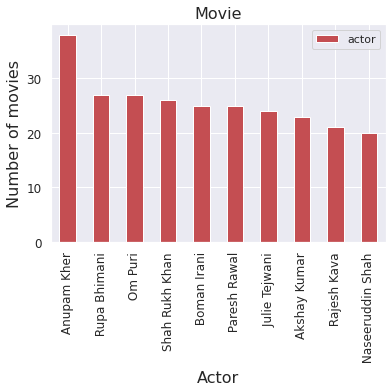

In [ ]:
plt.figure(figsize=(15,15))
cast.plot(kind='bar',legend=True,fontsize=12,color='r')
plt.title('Movie',fontsize=16)
plt.ylabel('Number of movies',fontsize=16)
plt.xlabel('Actor',fontsize=16)
plt.show()

Dikarenakan data aktor/aktris kebanyakan tidak diketahui. Maka, diagram di atas hanya menampilkan pemain yang ada dalam dataset tersebut. Lalu, pada diagram di atas aktor/aktris paling banyak memainkan peran dalam movie pada netflix adalah Anupam Kher.

## F.2. Aktor/aktris TV Show

In [ ]:
cast_tv = pd.DataFrame(df.cast.str.split(',').tolist(), index=df.type).stack()
cast_tv = cast_tv.reset_index([0, 'type'])
cast_tv.columns = ['type', 'actor']
cast_tv.drop(cast_tv[cast_tv['actor']=='Anonymous'].index, inplace=True)
cast_tv = cast_tv[(cast_tv["type"]=='TV Show')]["actor"].value_counts().head(10).to_frame()

<Figure size 1080x1080 with 0 Axes>

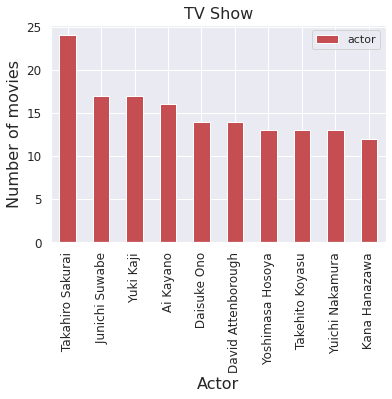

In [ ]:
plt.figure(figsize=(15,15))
cast_tv.plot(kind='bar',legend=True,fontsize=12,color='r')
plt.title('TV Show',fontsize=16)
plt.ylabel('Number of movies',fontsize=16)
plt.xlabel('Actor',fontsize=16)
plt.show()

Dikarenakan data aktor/aktris kebanyakan tidak diketahui. Maka, diagram di atas hanya menampilkan pemain yang ada dalam dataset tersebut. Lalu, pada diagram di atas aktor/aktris paling banyak memainkan peran dalam TV Show pada netflix adalah Takahiro Sakurai

# **G. Kesimpulan**

Berdasarkan analisa di atas, kita dapat memiliki beberapa rekomendasi pembuatan film kepada pihak ketiga. Pembuatan film dapat ditinjau berdasarkan Negara, Sutradara, Aktor, Klasifikasi berdasarkan umur dan lain-lain.